In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(dpi=1200)
%matplotlib inline
import seaborn

pd.set_option('mode.use_inf_as_na', True)

In [2]:
TRENDS_TARGET_FILE = "trends_v6.csv.gz"#"trends_v5.csv.gz"

trends df file is after predefining start point as being after at least (4?) cases of >0 in previous 5 (?) years.

* Target def used in latest odel is being after ~ 1980 (with 4-5~ Y offset. PAtents in patentview start around 1976) 

* Data in this DF is ALREADH filtered for `df.loc[df["Year"]>=df["start"]]`


* orig `df["y_pct_bins"] = pd.cut(df["y_pct_diff"],bins=[-20,-0.04,0.04,20])`
* orig `df = df.loc[df["year_num"]<2020]`

* Orig `df["pct_diff_lag6"] = df.groupby("variable")["y_pct_diff"].shift(6)` - that is not right target! Existing is diff of consecutive year, we want vs "current" year!

In [3]:
df = pd.read_csv(TRENDS_TARGET_FILE,parse_dates=["Year","first","start"])#.set_index("Year")
df.drop(columns=[ 'lag2','lag3','y_pct_bins'],errors="ignore",inplace=True)

df["reviews_lag5"] = df.groupby("variable")["reviews"].shift(5).fillna(0)
df["patent_count_lag5"] = df.groupby("variable")["patent_count"].shift(5).fillna(0)
df["patent_count_lag1"] = df.groupby("variable")["patent_count"].shift(1).fillna(0)
df["patent_frac_lag5"] = df.groupby("variable")["patent_frac"].shift(5).fillna(0)

## ADD: SORT:
df = df.sort_values(["Year","variable"])
display(df.describe().round(2))
df

,y_raw,reviews,research_review_diff,research_review_ratio,pct_diff,patent_count,patent_frac,patent_yearly_total,lag1,lag4,...,y_diff,y_pct_diff,diff_lag5,diff_lag6,pct_diff_lag5,pct_diff_lag6,reviews_lag5,patent_count_lag5,patent_count_lag1,patent_frac_lag5
count,7033.00,7033.00,7033.00,7033.00,7033.00,7033.00,7033.00,7033.00,7033.00,7033.00,...,7033.00,7033.00,7033.00,7033.00,6409.00,6285.00,7033.00,7033.00,7033.00,7033.00
mean,557.42,48.52,517.27,-1.73,0.12,24.44,0.25,7285.48,545.58,509.73,...,11.61,0.10,59.10,72.31,0.11,0.11,41.07,17.34,22.60,0.22
std,1202.94,124.41,1209.14,19.33,0.51,84.74,0.74,7354.17,1186.02,1135.22,...,85.66,0.47,253.41,290.14,0.49,0.49,114.55,59.14,76.15,0.70
min,0.00,0.00,-1279.21,-591.94,-0.93,0.00,0.00,0.00,0.00,0.00,...,-1069.85,-1.00,-2157.85,-1702.17,-1.00,-1.00,0.00,0.00,0.00,0.00
25%,23.62,0.37,7.37,0.73,-0.04,0.00,0.00,0.00,21.56,16.01,...,-4.10,-0.04,-5.18,-4.22,-0.04,-0.04,0.00,0.00,0.00,0.00
50%,146.73,8.01,103.68,0.98,0.02,0.00,0.00,4236.00,139.16,117.03,...,0.99,0.02,6.25,7.98,0.02,0.02,4.14,0.00,0.00,0.00
75%,500.17,35.52,467.41,1.00,0.13,6.00,0.08,11905.00,490.41,461.43,...,13.82,0.12,57.16,67.59,0.13,0.13,27.72,3.00,5.00,0.04
max,12747.16,1427.12,12714.12,1.00,11.82,2053.00,8.24,25883.00,11909.16,11909.16,...,1869.21,11.82,4048.10,5080.89,11.82,11.82,1427.12,979.00,1281.00,8.24


,Year,variable,y_raw,reviews,research_review_diff,research_review_ratio,pct_diff,patent_count,patent_frac,patent_yearly_total,...,y_diff,y_pct_diff,diff_lag5,diff_lag6,pct_diff_lag5,pct_diff_lag6,reviews_lag5,patent_count_lag5,patent_count_lag1,patent_frac_lag5
0,1950-01-01,BLAST,17.4841,0.0000,17.4841,1.0000,-0.1550,0.0,0.0000,0.0,...,0.0000,0.000000,-16.6406,17.4841,NaN,NaN,0.0000,0.0,0.0,0.0000
372,1950-01-01,EEG,346.1861,0.0000,346.1861,1.0000,0.3426,0.0,0.0000,0.0,...,0.0000,0.000000,190.1875,346.1861,NaN,NaN,0.0000,0.0,0.0,0.0000
443,1950-01-01,Epidemiology,416.1227,0.0000,416.1227,1.0000,-0.5194,0.0,0.0000,0.0,...,0.0000,0.000000,-2157.8548,416.1227,NaN,NaN,0.0000,0.0,0.0,0.0000
693,1950-01-01,Histamine,635.2574,0.0000,635.2574,1.0000,0.2511,0.0,0.0000,0.0,...,0.0000,0.000000,464.6339,635.2574,NaN,NaN,0.0000,0.0,0.0,0.0000
938,1950-01-01,Medulla oblongata,19.8154,0.0000,19.8154,1.0000,0.2449,0.0,0.0000,0.0,...,0.0000,0.000000,-9.4343,19.8154,NaN,NaN,0.0000,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6753,2020-01-01,vaccine,1641.1449,314.8025,1585.5191,0.9661,0.1664,488.0,1.8854,25883.0,...,234.1868,0.166449,173.8921,173.5360,-0.000243,0.019613,258.3001,299.0,483.0,1.5224
6822,2020-01-01,viral therapy,1272.5626,267.5452,1242.1653,0.9761,1.4837,21.0,0.0811,25883.0,...,760.2058,1.483743,684.3095,667.9310,-0.027088,0.007047,122.8675,16.0,23.0,0.0815
6893,2020-01-01,vitamin C,186.8140,16.1832,183.6143,0.9829,-0.0384,0.0,0.0000,25883.0,...,-7.4670,-0.038434,-1.5829,-10.3882,-0.044651,-0.052529,12.7241,0.0,0.0,0.0000
6964,2020-01-01,vitamin D,351.0454,54.0874,343.1076,0.9774,-0.0377,0.0,0.0000,25883.0,...,-13.7373,-0.037659,-42.6078,-41.6997,0.002312,-0.008450,69.2671,0.0,0.0,0.0000


In [4]:
df = df[df['variable'].groupby(df['variable']).transform('size')>5].round(3)

In [5]:
df.shift(5)

,Year,variable,y_raw,reviews,research_review_diff,research_review_ratio,pct_diff,patent_count,patent_frac,patent_yearly_total,...,y_diff,y_pct_diff,diff_lag5,diff_lag6,pct_diff_lag5,pct_diff_lag6,reviews_lag5,patent_count_lag5,patent_count_lag1,patent_frac_lag5
0,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6753,2020-01-01,substance P,26.028,3.261,23.752,0.912,-0.118,0.0,0.000,25883.0,...,-3.501,-0.119,-4.748,-12.051,-0.192,0.016,3.897,0.0,0.0,0.000
6822,2020-01-01,subthalamus,20.798,1.169,0.185,0.009,0.093,0.0,0.000,25883.0,...,1.775,0.093,-5.445,-4.174,0.051,-0.049,1.909,0.0,0.0,0.000
6893,2020-01-01,synthetic biology,331.593,66.257,265.336,0.800,-0.010,8.0,0.031,25883.0,...,-3.390,-0.010,55.634,92.390,0.154,0.335,47.862,3.0,5.0,0.015
6964,2020-01-01,thalamus,133.034,9.230,86.823,0.653,-0.124,1.0,0.004,25883.0,...,-18.870,-0.124,-26.654,-23.350,0.021,-0.080,15.348,1.0,1.0,0.005


### Version of data will all varialbes at lag 5 (except for y_Raw
* note - col names are now misleading! 

In [6]:
df_lag = pd.concat([df[["y_raw","Year","variable"]],
           df.drop(columns=["Year"]).groupby("variable").shift(5).rename(columns={"y_raw":"y_raw_lag5"})], axis=1)
print(df_lag.shape[0])
df_lag.head(8)

7029


,y_raw,Year,variable,y_raw_lag5,reviews,research_review_diff,research_review_ratio,pct_diff,patent_count,patent_frac,...,y_diff,y_pct_diff,diff_lag5,diff_lag6,pct_diff_lag5,pct_diff_lag6,reviews_lag5,patent_count_lag5,patent_count_lag1,patent_frac_lag5
0,17.484,1950-01-01,BLAST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,346.186,1950-01-01,EEG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,416.123,1950-01-01,Epidemiology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693,635.257,1950-01-01,Histamine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,19.815,1950-01-01,Medulla oblongata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,86.255,1950-01-01,Mononucleosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1186,4.662,1950-01-01,Orbitofrontal cortex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1307,4.662,1950-01-01,Prefrontal cortex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_lag["y_raw"].rolling(5).count()

/var/folders/hl/bb0z87yd5pzfcp81jc8662kr0000gn/T/ipykernel_5372/716666860.py:1: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  df_lag["y_raw"].rolling(5).count()


0       1.0
372     2.0
443     3.0
693     4.0
938     5.0
       ... 
6753    5.0
6822    5.0
6893    5.0
6964    5.0
7032    5.0
Name: y_raw, Length: 7029, dtype: float64

In [8]:
## first patents in 1976
df[df["patent_count"]>0]["Year"].min() 

Timestamp('1976-01-01 00:00:00')

In [9]:
df.corr().round(3)

/var/folders/hl/bb0z87yd5pzfcp81jc8662kr0000gn/T/ipykernel_5372/352886112.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(3)


,y_raw,reviews,research_review_diff,research_review_ratio,pct_diff,patent_count,patent_frac,patent_yearly_total,lag1,lag4,...,y_diff,y_pct_diff,diff_lag5,diff_lag6,pct_diff_lag5,pct_diff_lag6,reviews_lag5,patent_count_lag5,patent_count_lag1,patent_frac_lag5
y_raw,1.000,0.873,0.996,0.064,-0.072,0.376,0.368,0.122,0.997,0.984,...,0.227,-0.064,0.427,0.456,-0.052,-0.050,0.850,0.409,0.394,0.361
reviews,0.873,1.000,0.867,0.053,-0.064,0.432,0.374,0.226,0.870,0.858,...,0.210,-0.057,0.376,0.393,-0.049,-0.048,0.962,0.470,0.455,0.388
research_review_diff,0.996,0.867,1.000,0.086,-0.070,0.368,0.365,0.099,0.994,0.980,...,0.228,-0.062,0.428,0.457,-0.051,-0.049,0.843,0.401,0.386,0.358
research_review_ratio,0.064,0.053,0.086,1.000,-0.012,0.037,0.044,-0.001,0.063,0.062,...,0.018,0.000,0.032,0.034,-0.013,0.002,0.049,0.038,0.039,0.041
pct_diff,-0.072,-0.064,-0.070,-0.012,1.000,-0.050,-0.058,-0.112,-0.084,-0.086,...,0.147,0.888,0.037,0.028,0.080,0.049,-0.072,-0.059,-0.055,-0.060
patent_count,0.376,0.432,0.368,0.037,-0.050,1.000,0.739,0.297,0.378,0.382,...,0.045,-0.044,0.095,0.097,-0.040,-0.039,0.434,0.880,0.975,0.655
patent_frac,0.368,0.374,0.365,0.044,-0.058,0.739,1.000,0.118,0.370,0.374,...,0.050,-0.052,0.092,0.096,-0.042,-0.042,0.357,0.673,0.734,0.820
patent_yearly_total,0.122,0.226,0.099,-0.001,-0.112,0.297,0.118,1.000,0.126,0.136,...,-0.029,-0.094,-0.035,-0.041,-0.078,-0.076,0.254,0.296,0.303,0.135
lag1,0.997,0.870,0.994,0.063,-0.084,0.378,0.370,0.126,1.000,0.989,...,0.158,-0.076,0.393,0.425,-0.055,-0.053,0.853,0.414,0.398,0.364
lag4,0.984,0.858,0.980,0.062,-0.086,0.382,0.374,0.136,0.989,1.000,...,0.127,-0.079,0.270,0.316,-0.061,-0.060,0.861,0.423,0.404,0.371


### ADD: filter by dates

In [10]:
## NEW v 2.1: added here
df = df[df.Year.dt.year>=1979]
print(df.shape)

(4819, 30)


In [11]:
df[df.Year.dt.year>=1979].corr().round(2)

/var/folders/hl/bb0z87yd5pzfcp81jc8662kr0000gn/T/ipykernel_5372/3574653741.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.Year.dt.year>=1979].corr().round(2)


,y_raw,reviews,research_review_diff,research_review_ratio,pct_diff,patent_count,patent_frac,patent_yearly_total,lag1,lag4,...,y_diff,y_pct_diff,diff_lag5,diff_lag6,pct_diff_lag5,pct_diff_lag6,reviews_lag5,patent_count_lag5,patent_count_lag1,patent_frac_lag5
y_raw,1.00,0.91,1.00,0.07,-0.08,0.39,0.40,0.08,1.00,0.99,...,0.28,-0.08,0.45,0.47,-0.06,-0.06,0.89,0.43,0.41,0.38
reviews,0.91,1.00,0.90,0.07,-0.07,0.41,0.38,0.13,0.90,0.89,...,0.30,-0.07,0.47,0.50,-0.05,-0.05,0.96,0.45,0.44,0.36
research_review_diff,1.00,0.90,1.00,0.09,-0.08,0.39,0.40,0.06,0.99,0.99,...,0.29,-0.08,0.45,0.47,-0.06,-0.06,0.89,0.43,0.41,0.38
research_review_ratio,0.07,0.07,0.09,1.00,-0.04,0.05,0.06,0.05,0.07,0.07,...,0.02,-0.01,0.04,0.04,-0.02,-0.00,0.06,0.05,0.05,0.05
pct_diff,-0.08,-0.07,-0.08,-0.04,1.00,-0.05,-0.06,-0.11,-0.08,-0.09,...,0.12,0.91,0.05,0.05,0.10,0.09,-0.08,-0.07,-0.06,-0.07
patent_count,0.39,0.41,0.39,0.05,-0.05,1.00,0.76,0.24,0.40,0.40,...,0.07,-0.05,0.14,0.15,-0.04,-0.04,0.42,0.88,0.98,0.64
patent_frac,0.40,0.38,0.40,0.06,-0.06,0.76,1.00,-0.00,0.40,0.40,...,0.10,-0.06,0.15,0.16,-0.04,-0.04,0.36,0.72,0.76,0.88
patent_yearly_total,0.08,0.13,0.06,0.05,-0.11,0.24,-0.00,1.00,0.08,0.09,...,-0.05,-0.10,-0.03,-0.02,-0.07,-0.07,0.16,0.23,0.24,0.00
lag1,1.00,0.90,0.99,0.07,-0.08,0.40,0.40,0.08,1.00,0.99,...,0.24,-0.08,0.42,0.45,-0.07,-0.06,0.89,0.44,0.42,0.38
lag4,0.99,0.89,0.99,0.07,-0.09,0.40,0.40,0.09,0.99,1.00,...,0.20,-0.09,0.33,0.36,-0.08,-0.07,0.90,0.44,0.42,0.38


#### patnet lag
* validates resu;ts with crispr on all data

In [12]:
df["Year"]

29     1979-01-01
118    1979-01-01
202    1979-01-01
245    1979-01-01
291    1979-01-01
          ...    
6753   2020-01-01
6822   2020-01-01
6893   2020-01-01
6964   2020-01-01
7032   2020-01-01
Name: Year, Length: 4819, dtype: datetime64[ns]

In [13]:
df["Year"].shift(-1)

29     1979-01-01
118    1979-01-01
202    1979-01-01
245    1979-01-01
291    1979-01-01
          ...    
6753   2020-01-01
6822   2020-01-01
6893   2020-01-01
6964   2020-01-01
7032          NaT
Name: Year, Length: 4819, dtype: datetime64[ns]

In [14]:
# display(df.iloc[:,0:4].round())
# df_g = df.groupby(["variable"])
# for i in range(-2,2):
#     print(i,df_g.apply(lambda df: df['y_raw'].corr(df['reviews'].shift(i))).mean().round(2))

# df2 = df.copy().sort_values(["Year"])
for i in range(-3,7):
    ## assumes data sorted! 
    df["lagged"] = df.groupby("variable")["y_raw"].shift(i).fillna(0) ## fillna 0 greatly changes results!!
    print(i,df['y_raw'].corr(df["lagged"]).round(4))
    df.drop(columns=["lagged"],inplace=True)

-3 0.9243
-2 0.9504
-1 0.9754
0 1.0
1 0.9924
2 0.9838
3 0.9742
4 0.9638
5 0.953
6 0.9413


In [15]:
df_g = df.groupby(["variable"])
for i in range(-6,6):#[-1,0,1,2]:
#     print(i,df_g["y_raw"].shift(i).corr(df_g["patent_count"]))
    print(i,df_g.apply(lambda df: df['y_raw'].corr(df['patent_count'].shift(i))).mean().round(3))

/Users/oferd2/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/oferd2/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


-6 0.384
-5 0.396
-4 0.394
-3 0.401
-2 0.398
-1 0.402
0 0.39
1 0.368
2 0.357
3 0.341
4 0.331
5 0.301


In [16]:
### future y target (for lagged corr with other variables)
df["y_future_4"] = df.groupby(["variable"])["y_raw"].shift(-4)
df["pct_diff_lag4"] = df.groupby("variable")["y_raw"].pct_change(4) # change vs 4 years prior
df

,Year,variable,y_raw,reviews,research_review_diff,research_review_ratio,pct_diff,patent_count,patent_frac,patent_yearly_total,...,diff_lag5,diff_lag6,pct_diff_lag5,pct_diff_lag6,reviews_lag5,patent_count_lag5,patent_count_lag1,patent_frac_lag5,y_future_4,pct_diff_lag4
29,1979-01-01,BLAST,103.509,1.418,103.509,1.000,-0.027,87.0,4.564,1906.0,...,63.102,69.328,0.182,0.053,0.425,0.0,106.0,0.000,147.965,NaN
118,1979-01-01,Brodmann area,2.127,0.000,-4.254,-2.000,0.932,0.0,0.000,1906.0,...,1.702,2.127,NaN,NaN,0.000,0.0,0.0,0.000,0.969,NaN
202,1979-01-01,Cingulate cortex,13.825,0.000,13.825,1.000,-0.008,0.0,0.000,1906.0,...,-2.338,-6.943,-0.222,0.632,1.276,0.0,0.0,0.000,22.938,NaN
245,1979-01-01,DNA array,4.254,0.354,4.254,1.000,0.160,0.0,0.000,1906.0,...,3.403,3.388,NaN,NaN,0.000,0.0,0.0,0.000,11.954,NaN
291,1979-01-01,Dorsolateral prefrontal cortex,1.063,0.000,-40.056,-37.667,-0.586,0.0,0.000,1906.0,...,0.638,0.631,NaN,NaN,0.000,0.0,0.0,0.000,1.292,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6753,2020-01-01,vaccine,1641.145,314.802,1585.519,0.966,0.166,488.0,1.885,25883.0,...,173.892,173.536,-0.000,0.020,258.300,299.0,483.0,1.522,NaN,0.150507
6822,2020-01-01,viral therapy,1272.563,267.545,1242.165,0.976,1.484,21.0,0.081,25883.0,...,684.310,667.931,-0.027,0.007,122.868,16.0,23.0,0.082,NaN,1.306513
6893,2020-01-01,vitamin C,186.814,16.183,183.614,0.983,-0.038,0.0,0.000,25883.0,...,-1.583,-10.388,-0.045,-0.053,12.724,0.0,0.0,0.000,NaN,0.025054
6964,2020-01-01,vitamin D,351.045,54.087,343.108,0.977,-0.038,0.0,0.000,25883.0,...,-42.608,-41.700,0.002,-0.008,69.267,0.0,0.0,0.000,NaN,-0.095261


### Filter date range

In [17]:
# df.loc[df["Year"]>=df["start"]]
df = df.loc[df["Year"].dt.year>=1979]
print(df.shape[0])

4819


In [18]:
df.corrwith(df["y_raw"]).round(3).sort_values() # leaky model

/var/folders/hl/bb0z87yd5pzfcp81jc8662kr0000gn/T/ipykernel_5372/1715924744.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df["y_raw"]).round(3).sort_values() # leaky model


review_research_diff_2    -0.999
pct_diff                  -0.076
y_pct_diff                -0.075
pct_diff_lag4             -0.065
pct_diff_lag5             -0.062
pct_diff_lag6             -0.056
pat_div_research          -0.045
review_research_ratio_2    0.003
research_review_ratio      0.070
patent_yearly_total        0.079
year_num                   0.085
y_diff                     0.284
patent_frac_lag5           0.378
patent_count               0.393
patent_frac                0.404
patent_count_lag1          0.414
patent_count_lag5          0.431
diff_lag5                  0.451
diff_lag6                  0.471
reviews_lag5               0.893
reviews                    0.905
lag6                       0.983
lag5                       0.987
lag4                       0.991
y_future_4                 0.991
research_review_diff       0.996
lag1                       0.999
y_raw                      1.000
dtype: float64

In [19]:
df.corrwith(df["y_future_4"]).round(3).sort_values()

/var/folders/hl/bb0z87yd5pzfcp81jc8662kr0000gn/T/ipykernel_5372/4021283165.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df["y_future_4"]).round(3).sort_values()


review_research_diff_2    -0.988
pct_diff                  -0.066
y_pct_diff                -0.065
pct_diff_lag5             -0.054
pct_diff_lag6             -0.049
pat_div_research          -0.046
pct_diff_lag4             -0.045
review_research_ratio_2    0.018
patent_yearly_total        0.066
year_num                   0.071
research_review_ratio      0.072
y_diff                     0.356
patent_frac_lag5           0.361
patent_frac                0.407
patent_count_lag5          0.434
patent_count               0.436
patent_count_lag1          0.437
diff_lag5                  0.519
diff_lag6                  0.536
reviews_lag5               0.877
reviews                    0.904
lag6                       0.965
lag5                       0.970
lag4                       0.975
lag1                       0.987
research_review_diff       0.987
y_raw                      0.991
y_future_4                 1.000
dtype: float64

In [20]:
# df = df.replace(0,np.nan)  ## may not make sense - what about intermediate years with 0? 

* View distribution of future changes
* clip percent changes to bounds (helps with outliers). Maybe drop 0s?

In [21]:
df["y_pct_diff"].describe()

count    4819.000000
mean        0.076663
std         0.334045
min        -1.000000
25%        -0.037000
50%         0.015000
75%         0.096000
max         7.890000
Name: y_pct_diff, dtype: float64

In [22]:
df["y_pct_diff"].clip(lower=-1,upper=1).describe()

count    4819.000000
mean        0.062806
std         0.233964
min        -1.000000
25%        -0.037000
50%         0.015000
75%         0.096000
max         1.000000
Name: y_pct_diff, dtype: float64

##### % diff at lag

In [23]:
df["pct_diff_lag4"].describe()

count    4319.000000
mean        0.446884
std              NaN
min        -1.000000
25%        -0.075984
50%         0.077989
75%         0.351590
max        92.880734
Name: pct_diff_lag4, dtype: float64

<AxesSubplot: >

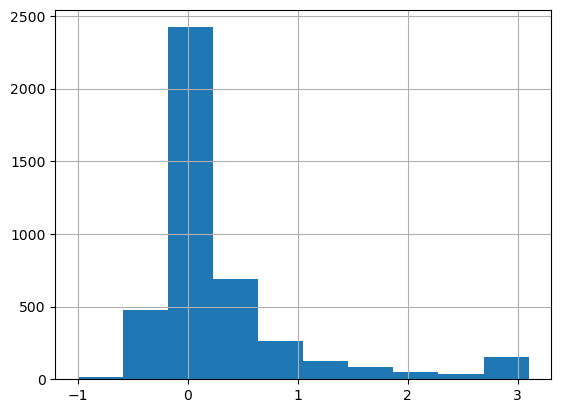

In [24]:
df["pct_diff_lag4"].clip(lower=-1,upper=3.1).hist()

In [25]:
df["pct_diff_lag4"].clip(lower=-1,upper=2).describe()

count    4319.000000
mean        0.265023
std         0.577608
min        -1.000000
25%        -0.075984
50%         0.077989
75%         0.351590
max         2.000000
Name: pct_diff_lag4, dtype: float64

<AxesSubplot: >

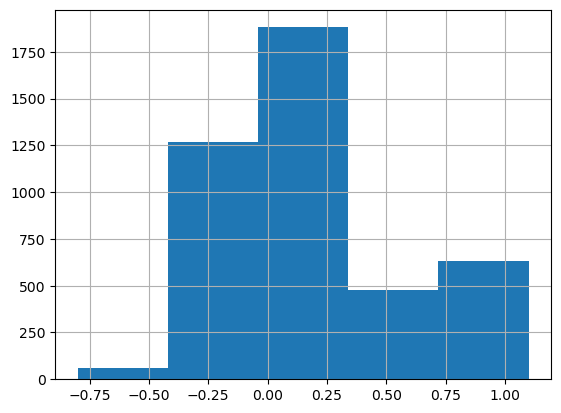

In [26]:
df["pct_diff_lag4"].clip(lower=-0.8,upper=1.1).hist(bins=5)

<AxesSubplot: >

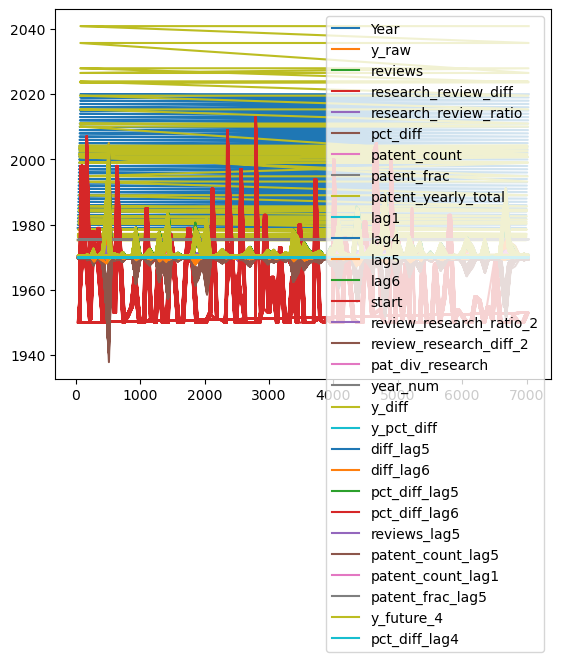

In [27]:
df.plot()

### 1st order difference makesi t easier to see big changes
* Note major OOM between topics

In [28]:
df.select_dtypes("number").columns

Index(['y_raw', 'reviews', 'research_review_diff', 'research_review_ratio',
       'pct_diff', 'patent_count', 'patent_frac', 'patent_yearly_total',
       'lag1', 'lag4', 'lag5', 'lag6', 'review_research_ratio_2',
       'review_research_diff_2', 'pat_div_research', 'year_num', 'y_diff',
       'y_pct_diff', 'diff_lag5', 'diff_lag6', 'pct_diff_lag5',
       'pct_diff_lag6', 'reviews_lag5', 'patent_count_lag5',
       'patent_count_lag1', 'patent_frac_lag5', 'y_future_4', 'pct_diff_lag4'],
      dtype='object')

<AxesSubplot: >

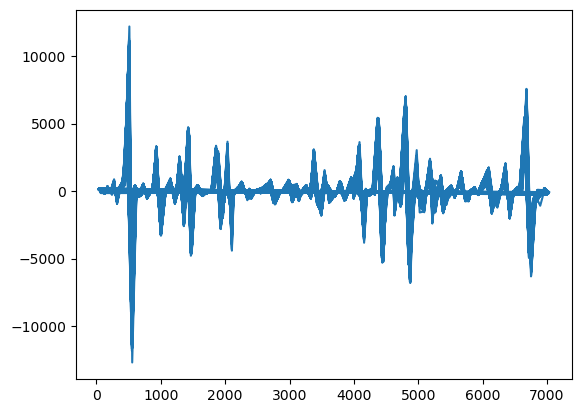

In [29]:
df.select_dtypes("number")['y_raw'].diff().plot()

<AxesSubplot: >

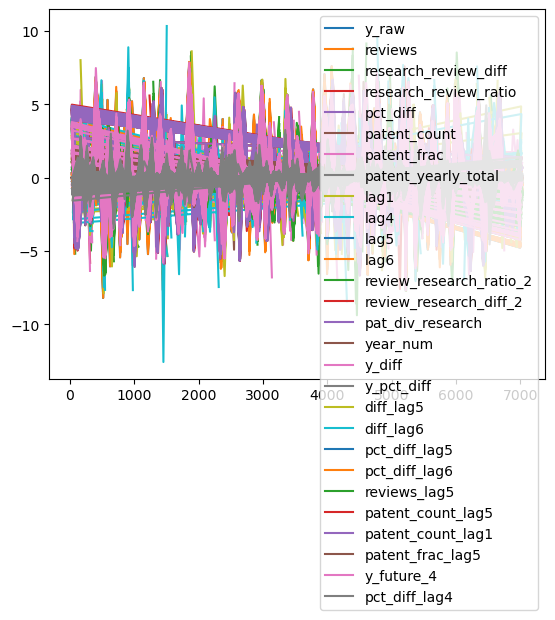

In [30]:
df.select_dtypes("number").apply(np.log1p).diff().plot()

In [31]:
# df.pct_change().clip(upper=1).plot()

In [32]:
df.groupby("variable")["y_raw"].count().describe().round(3)

count    124.000
mean      38.863
std        7.932
min        7.000
25%       42.000
50%       42.000
75%       42.000
max       42.000
Name: y_raw, dtype: float64

In [33]:
df.groupby("variable")["pct_diff"].count().describe().round(3)

count    124.000
mean      38.863
std        7.932
min        7.000
25%       42.000
50%       42.000
75%       42.000
max       42.000
Name: pct_diff, dtype: float64

# Stats on contexts
* How many reviews, papers, patents etc' (per keyword)

In [34]:
df_grp = df.set_index("Year").groupby("variable")

In [35]:
print("Overall patents")
df["patent_count"].describe().round(2)

print("total patents",df["patent_count"].sum())

Overall patents
total patents 167841.0


In [36]:
print("Overall reviews")
df["reviews"].describe().round(2)

# print("total (normalized) reviews",df["reviews"].sum()) ## this isn't meaningful since it's a fraction..

Overall reviews


count    4819.00
mean       65.66
std       145.59
min         0.00
25%         2.58
50%        15.39
75%        53.40
max      1427.12
Name: reviews, dtype: float64

* Per group stats- e.g. group with most reviews in a given year? or total? 

In [37]:
df_grp["reviews"].sum().describe().round(1)

count      124.0
mean      2551.9
std       5288.1
min          0.2
25%        189.5
50%        645.9
75%       2136.0
max      39121.2
Name: reviews, dtype: float64

In [38]:
# df_mesh = pd.read_csv("mesh_matrix_v5.csv.gz")
# df_mesh
df_mesh_flat= pd.read_csv("mesh_majr_v5.csv.gz")
# df_mesh_flat

print(df["variable"].nunique(), "# topic terms")
print(df_mesh_flat["variable"].nunique(), "# Majr mesh terms with TS")
# df_mesh_flat["variable"].drop_duplicates().to_csv("unique_meshes_output.csv",index=False)
# df["variable"].drop_duplicates().to_csv("unique_terms_v6_output.csv",index=False)

124 # topic terms
113 # Majr mesh terms with TS


### burst citation analysis? 
* Put into bins of stable, up or down?  (pct change YoY or 5Y diff?)
* https://www.tandfonline.com/doi/full/10.1517/14712598.2014.920813


In [39]:
df

,Year,variable,y_raw,reviews,research_review_diff,research_review_ratio,pct_diff,patent_count,patent_frac,patent_yearly_total,...,diff_lag5,diff_lag6,pct_diff_lag5,pct_diff_lag6,reviews_lag5,patent_count_lag5,patent_count_lag1,patent_frac_lag5,y_future_4,pct_diff_lag4
29,1979-01-01,BLAST,103.509,1.418,103.509,1.000,-0.027,87.0,4.564,1906.0,...,63.102,69.328,0.182,0.053,0.425,0.0,106.0,0.000,147.965,NaN
118,1979-01-01,Brodmann area,2.127,0.000,-4.254,-2.000,0.932,0.0,0.000,1906.0,...,1.702,2.127,NaN,NaN,0.000,0.0,0.0,0.000,0.969,NaN
202,1979-01-01,Cingulate cortex,13.825,0.000,13.825,1.000,-0.008,0.0,0.000,1906.0,...,-2.338,-6.943,-0.222,0.632,1.276,0.0,0.0,0.000,22.938,NaN
245,1979-01-01,DNA array,4.254,0.354,4.254,1.000,0.160,0.0,0.000,1906.0,...,3.403,3.388,NaN,NaN,0.000,0.0,0.0,0.000,11.954,NaN
291,1979-01-01,Dorsolateral prefrontal cortex,1.063,0.000,-40.056,-37.667,-0.586,0.0,0.000,1906.0,...,0.638,0.631,NaN,NaN,0.000,0.0,0.0,0.000,1.292,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6753,2020-01-01,vaccine,1641.145,314.802,1585.519,0.966,0.166,488.0,1.885,25883.0,...,173.892,173.536,-0.000,0.020,258.300,299.0,483.0,1.522,NaN,0.150507
6822,2020-01-01,viral therapy,1272.563,267.545,1242.165,0.976,1.484,21.0,0.081,25883.0,...,684.310,667.931,-0.027,0.007,122.868,16.0,23.0,0.082,NaN,1.306513
6893,2020-01-01,vitamin C,186.814,16.183,183.614,0.983,-0.038,0.0,0.000,25883.0,...,-1.583,-10.388,-0.045,-0.053,12.724,0.0,0.0,0.000,NaN,0.025054
6964,2020-01-01,vitamin D,351.045,54.087,343.108,0.977,-0.038,0.0,0.000,25883.0,...,-42.608,-41.700,0.002,-0.008,69.267,0.0,0.0,0.000,NaN,-0.095261


In [40]:
# df["pct_diff"].describe()
100*(df["pct_diff"].clip(upper=0.9,lower=-0.9)).describe().round(3)

count    481900.0
mean          6.3
std          22.8
min         -88.0
25%          -3.7
50%           1.6
75%           9.9
max          90.0
Name: pct_diff, dtype: float64

<AxesSubplot: >

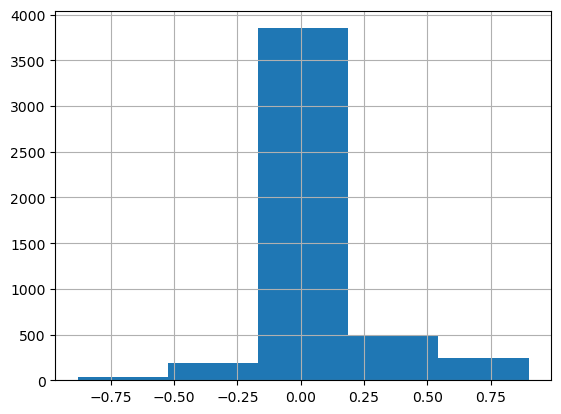

In [41]:
df["pct_diff"].clip(upper=0.9,lower=-0.9).hist(bins=5)

In [42]:
100*df.groupby("variable")["y_raw"].pct_change().dropna(axis=0).describe() ## diff # rows due to dropnans and inf

count    469000.000000
mean          7.820433
std          33.666773
min        -100.000000
25%          -3.709096
50%           1.571557
75%           9.678936
max         788.612100
Name: y_raw, dtype: float64

In [43]:
df

,Year,variable,y_raw,reviews,research_review_diff,research_review_ratio,pct_diff,patent_count,patent_frac,patent_yearly_total,...,diff_lag5,diff_lag6,pct_diff_lag5,pct_diff_lag6,reviews_lag5,patent_count_lag5,patent_count_lag1,patent_frac_lag5,y_future_4,pct_diff_lag4
29,1979-01-01,BLAST,103.509,1.418,103.509,1.000,-0.027,87.0,4.564,1906.0,...,63.102,69.328,0.182,0.053,0.425,0.0,106.0,0.000,147.965,NaN
118,1979-01-01,Brodmann area,2.127,0.000,-4.254,-2.000,0.932,0.0,0.000,1906.0,...,1.702,2.127,NaN,NaN,0.000,0.0,0.0,0.000,0.969,NaN
202,1979-01-01,Cingulate cortex,13.825,0.000,13.825,1.000,-0.008,0.0,0.000,1906.0,...,-2.338,-6.943,-0.222,0.632,1.276,0.0,0.0,0.000,22.938,NaN
245,1979-01-01,DNA array,4.254,0.354,4.254,1.000,0.160,0.0,0.000,1906.0,...,3.403,3.388,NaN,NaN,0.000,0.0,0.0,0.000,11.954,NaN
291,1979-01-01,Dorsolateral prefrontal cortex,1.063,0.000,-40.056,-37.667,-0.586,0.0,0.000,1906.0,...,0.638,0.631,NaN,NaN,0.000,0.0,0.0,0.000,1.292,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6753,2020-01-01,vaccine,1641.145,314.802,1585.519,0.966,0.166,488.0,1.885,25883.0,...,173.892,173.536,-0.000,0.020,258.300,299.0,483.0,1.522,NaN,0.150507
6822,2020-01-01,viral therapy,1272.563,267.545,1242.165,0.976,1.484,21.0,0.081,25883.0,...,684.310,667.931,-0.027,0.007,122.868,16.0,23.0,0.082,NaN,1.306513
6893,2020-01-01,vitamin C,186.814,16.183,183.614,0.983,-0.038,0.0,0.000,25883.0,...,-1.583,-10.388,-0.045,-0.053,12.724,0.0,0.0,0.000,NaN,0.025054
6964,2020-01-01,vitamin D,351.045,54.087,343.108,0.977,-0.038,0.0,0.000,25883.0,...,-42.608,-41.700,0.002,-0.008,69.267,0.0,0.0,0.000,NaN,-0.095261


In [44]:
df_burst = df.groupby("variable",as_index=False)[["Year","variable","pct_diff"]].tail(30) # .clip(upper=0.9,lower=-0.9)
df_burst["pct_diff"] = df_burst["pct_diff"].clip(upper=1,lower=-1)
df_burst = df_burst.groupby("variable").filter(lambda x: len(x) > 5)
df_burst.sort_values(["variable","Year"],inplace=True)

df_burst

,Year,variable,pct_diff
41,1991-01-01,BLAST,0.010
42,1992-01-01,BLAST,-0.034
43,1993-01-01,BLAST,-0.024
44,1994-01-01,BLAST,-0.091
45,1995-01-01,BLAST,0.065
...,...,...,...
7028,2016-01-01,zebra fish,0.109
7029,2017-01-01,zebra fish,-0.016
7030,2018-01-01,zebra fish,0.049
7031,2019-01-01,zebra fish,0.054


In [45]:
df_burst["pct_diff"].clip(upper=0.5,lower=-0.5).describe().round(3)

count    3550.000
mean        0.043
std         0.159
min        -0.500
25%        -0.036
50%         0.012
75%         0.085
max         0.500
Name: pct_diff, dtype: float64

In [46]:
df_burst["pct_diff"].clip(upper=0.5,lower=-0.5).abs().describe().round(3)

count    3550.000
mean        0.105
std         0.128
min         0.000
25%         0.023
50%         0.055
75%         0.125
max         0.500
Name: pct_diff, dtype: float64

In [47]:
# from sentence_transformers import SentenceTransformer, util
# model = SentenceTransformer('all-MiniLM-L6-v2')

### Paper figures

* time series of large number of time-series. PArtition based on abbsolute scale

In [48]:
df

,Year,variable,y_raw,reviews,research_review_diff,research_review_ratio,pct_diff,patent_count,patent_frac,patent_yearly_total,...,diff_lag5,diff_lag6,pct_diff_lag5,pct_diff_lag6,reviews_lag5,patent_count_lag5,patent_count_lag1,patent_frac_lag5,y_future_4,pct_diff_lag4
29,1979-01-01,BLAST,103.509,1.418,103.509,1.000,-0.027,87.0,4.564,1906.0,...,63.102,69.328,0.182,0.053,0.425,0.0,106.0,0.000,147.965,NaN
118,1979-01-01,Brodmann area,2.127,0.000,-4.254,-2.000,0.932,0.0,0.000,1906.0,...,1.702,2.127,NaN,NaN,0.000,0.0,0.0,0.000,0.969,NaN
202,1979-01-01,Cingulate cortex,13.825,0.000,13.825,1.000,-0.008,0.0,0.000,1906.0,...,-2.338,-6.943,-0.222,0.632,1.276,0.0,0.0,0.000,22.938,NaN
245,1979-01-01,DNA array,4.254,0.354,4.254,1.000,0.160,0.0,0.000,1906.0,...,3.403,3.388,NaN,NaN,0.000,0.0,0.0,0.000,11.954,NaN
291,1979-01-01,Dorsolateral prefrontal cortex,1.063,0.000,-40.056,-37.667,-0.586,0.0,0.000,1906.0,...,0.638,0.631,NaN,NaN,0.000,0.0,0.0,0.000,1.292,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6753,2020-01-01,vaccine,1641.145,314.802,1585.519,0.966,0.166,488.0,1.885,25883.0,...,173.892,173.536,-0.000,0.020,258.300,299.0,483.0,1.522,NaN,0.150507
6822,2020-01-01,viral therapy,1272.563,267.545,1242.165,0.976,1.484,21.0,0.081,25883.0,...,684.310,667.931,-0.027,0.007,122.868,16.0,23.0,0.082,NaN,1.306513
6893,2020-01-01,vitamin C,186.814,16.183,183.614,0.983,-0.038,0.0,0.000,25883.0,...,-1.583,-10.388,-0.045,-0.053,12.724,0.0,0.0,0.000,NaN,0.025054
6964,2020-01-01,vitamin D,351.045,54.087,343.108,0.977,-0.038,0.0,0.000,25883.0,...,-42.608,-41.700,0.002,-0.008,69.267,0.0,0.0,0.000,NaN,-0.095261


In [62]:
df2 = df.loc[df["Year"].dt.year>=1990].iloc[:,0:3].set_index("Year")

,variable,y_raw
Year,,
1990-01-01,BLAST,186.910
1990-01-01,Brodmann area,2.434
1990-01-01,Cingulate cortex,26.528
1990-01-01,DNA array,27.988
1990-01-01,Dorsolateral prefrontal cortex,3.407
...,...,...
2020-01-01,vaccine,1641.145
2020-01-01,viral therapy,1272.563
2020-01-01,vitamin C,186.814


In [63]:
df2.groupby("variable").std().describe()

,y_raw
count,124.000000
mean,168.556397
std,255.996850
min,0.171827
25%,24.509786
50%,82.070016
75%,168.642321
max,1820.198029


array([[<AxesSubplot: title={'center': 'y_raw'}>]], dtype=object)

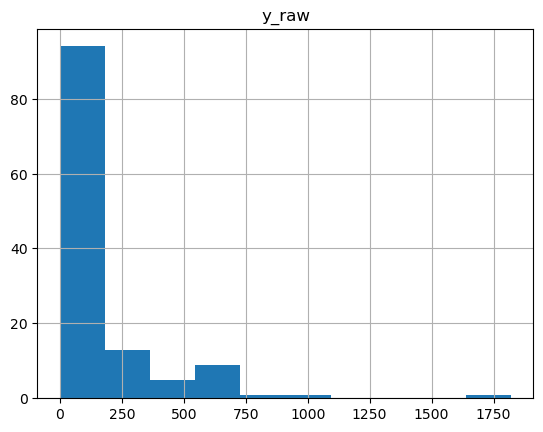

In [64]:
df2.groupby("variable").std().hist()

In [65]:
df2.groupby("variable").mean().describe().round(1)

,y_raw
count,124.0
mean,669.4
std,1364.3
min,0.1
25%,71.4
50%,188.4
75%,607.0
max,9654.0


In [66]:
grp_std = df2.groupby("variable").std().sort_values("y_raw").reset_index()
grp_std

,variable,y_raw
0,neutrotransmitter,0.171827
1,crypto,0.435880
2,savant,0.661149
3,cumin,2.017731
4,soy milk,2.568551
...,...,...
119,ultrasound,719.943939
120,PCR,720.674868
121,inflammatory,835.135110
122,aquaphonic agriculture,1081.727596


In [67]:
grp_mean = df2.groupby("variable").mean().sort_values("y_raw").reset_index()
grp_mean

,variable,y_raw
0,neutrotransmitter,0.121500
1,crypto,0.964903
2,savant,2.093323
3,cumin,3.330097
4,carbon dating,4.008677
...,...,...
119,RNA,4505.042355
120,lipid,5065.317161
121,ultrasound,5944.297323
122,mouse,6476.713129


In [106]:
# mini_terms_1 = list(grp_mean[grp_mean["y_raw"]<14]["variable"])
mini_terms_1 = ['neutrotransmitter',
 'savant',
 'cumin',
 'carbon dating',
#  'ancient viruses',
 'Brodmann area',
 'graph neural network',
 'cannabidiol',
#  'soy milk'
               ]
mini_terms_1

['neutrotransmitter',
 'savant',
 'cumin',
 'carbon dating',
 'Brodmann area',
 'graph neural network',
 'cannabidiol']

* To do figure legend outside of plot:
    * https://stackoverflow.com/a/64422943/1610518

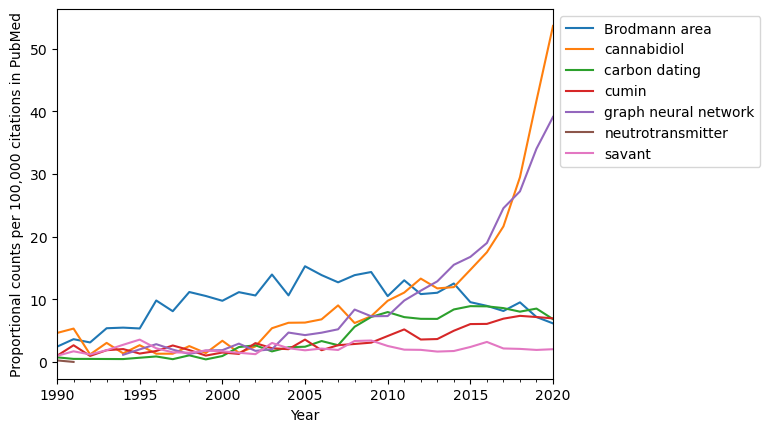

In [108]:
ax=df2.loc[df2["variable"].isin(mini_terms_1)].groupby("variable")["y_raw"].plot(legend=True,
                                                                             ylabel="Proportional counts per 100,000 citations in PubMed")
ax[0].legend_.set_bbox_to_anchor((1.,1))
# plt.tight_layout()

plt.savefig('fig1-i.png', dpi=900)

In [121]:
# mini_terms_2 = list(grp_std.tail(25)["variable"])
mini_terms_2 = ['vaccine',
                'Epidemiology'
 'sleep',
 'machine learning',
 'genetic engineering',
 'epigenetics',
 'eugenics',
"RNA",
 'ncRNA',
 'miRNA',
 'lipid',
 'stem cells',
'DNA array',
"NGS",
 'mass spectrometry',
#  'neuropeptide',
 'gene therapy',
 'natural medicine',
#   'fMRI',
 'MRI',
 'ultrasound',
 'PCR',
 'aquaphonic agriculture',
 ]
print(len(mini_terms_2))               
# mini_terms_2

20


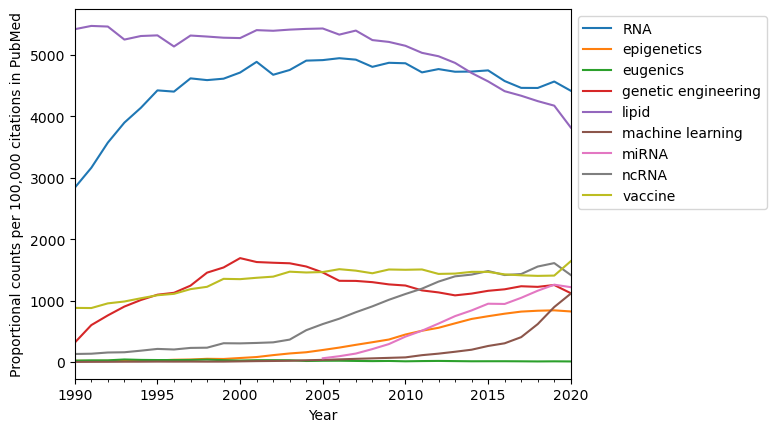

In [122]:
ax = df2.loc[df2["variable"].isin(mini_terms_2[0:10])].groupby("variable")["y_raw"].plot(legend=True,
                                                                             ylabel="Proportional counts per 100,000 citations in PubMed")
ax[0].legend_.set_bbox_to_anchor((1.,1))
plt.savefig('fig1-ii.png', dpi=900)

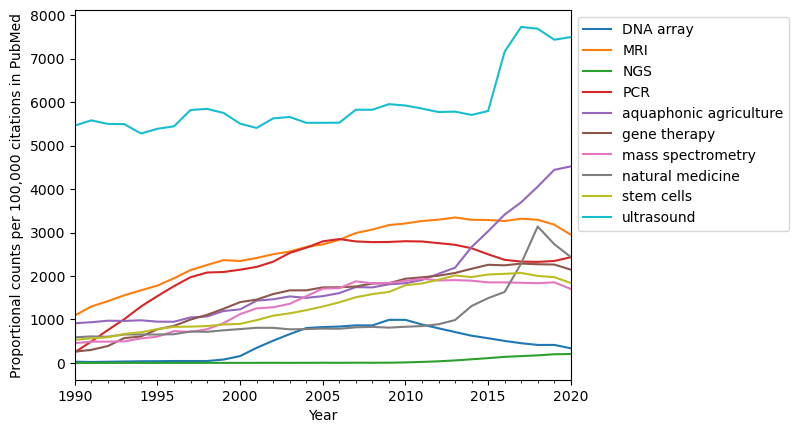

In [123]:
ax = df2.loc[df2["variable"].isin(mini_terms_2[10:])].groupby("variable")["y_raw"].plot(legend=True,
                                                                             ylabel="Proportional counts per 100,000 citations in PubMed")

ax[0].legend_.set_bbox_to_anchor((1.,1))
plt.savefig('fig1-iii.png', dpi=900)